A code example showing how to load NuSTAR evt file and check what it contains

In [1]:
from astropy.io import fits
import numpy as np
import astropy.time
import astropy.units as u
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.simplefilter('ignore')

dirin=''
infile = 'nu90410111001A06_cl_sunpos.evt'

# Load in the evt
hdulist = fits.open(dirin+infile)
# hdulist.info()
evtdata=hdulist[1].data
hdr = hdulist[1].header

# What are the column names of the event list (evtdata)
print(hdulist[1].columns.names)

hdulist.close()


['TIME', 'DET_ID', 'RAWX', 'RAWY', 'STATUS', 'GRADE', 'SURRPI', 'PI', 'DET1X', 'DET1Y', 'DET2X', 'DET2Y', 'X', 'Y']


In [2]:
# Setup the font used for plotting
matplotlib.rcParams['font.sans-serif'] = "Arial"
matplotlib.rcParams['font.family'] = "sans-serif"
matplotlib.rcParams['font.size'] = 18

In [3]:
# so what does the data look like?
print(evtdata)
print(evtdata[0])

[(2.75856515e+08, 3,  3,  0, [ 0, 16], 0, -18,  0, 202, 180, 338, 288, 1105, 1545)
 (2.75856515e+08, 0,  5,  3, [ 0,  0], 0, -24, 21, 203, 213, 338, 321, 1106, 1578)
 (2.75856515e+08, 1,  5, 22, [ 0,  0], 0, -20,  7, 151, 300, 287, 408, 1159, 1663)
 ...
 (2.75856616e+08, 2, 19,  8, [ 0,  0], 0, -13,  7, 136,  85, 270, 194, 1174, 1450)
 (2.75856616e+08, 0, 24, 20, [ 0,  0], 0,  -2, 16, 285, 304, 421, 411, 1028, 1671)
 (2.75856616e+08, 3,  9,  6, [ 0,  0], 0, -42,  0, 233, 147, 368, 255, 1078, 1513)]
(275856515.00043726, 3, 3, 0, array([ 0, 16], dtype=uint8), 0, -18, 0, 202, 180, 338, 288, 1105, 1545)


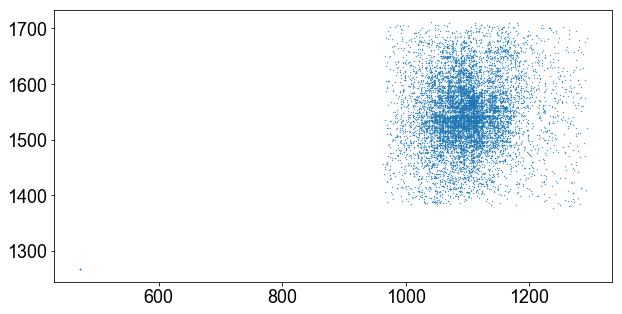

In [4]:
# plot the x,y position (1500,1500) is (0,0) in HPS
fig = plt.figure(figsize=(10, 5))
plt.plot(evtdata['x'],evtdata['y'],'.',ms=0.7)
plt.show()


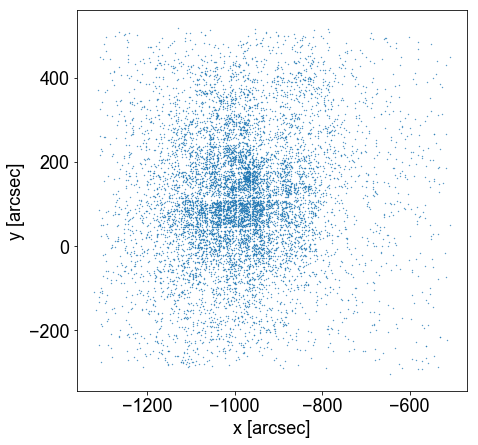

In [5]:
# plot the x,y position converted into HPS
# Find the correct keys to use
for field in hdr.keys():
    if field.find('TYPE') != -1:
        if hdr[field] == 'X':
            xval = field[5:8]
#  Using pixelsize and number of pixels same in x and y
#  Should be 3000 and 2.45810736 (x might be -ve from ra to HPS conversion, just need magnitude here)
npix=hdr['TLMAX'+xval]
pixsize=abs(hdr['TCDLT'+xval])

# get rid of the outlier points (value found from above plot)
xy_filter=evtdata["x"] > 800
goodinds=xy_filter.nonzero()
xx=evtdata["x"][goodinds]
yy=evtdata["y"][goodinds]

xa=pixsize*(xx-npix*0.5)
ya=pixsize*(yy-npix*0.5)

fig = plt.figure(figsize=(7, 7))
plt.plot(xa,ya,'.',ms=0.7)
plt.xlabel('x [arcsec]')
plt.ylabel('y [arcsec]')
plt.show()

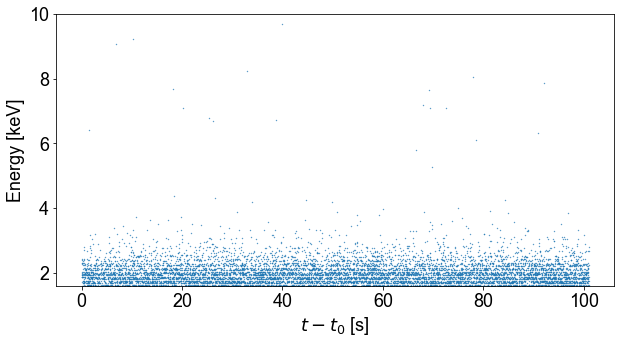

In [6]:
# plot the energy vs time (seconds from start)
# Energy = PI*0.04 +1.6 keV 

fig = plt.figure(figsize=(10, 5))
plt.plot(evtdata['time']-evtdata['time'][0],evtdata['pi']*0.04+1.6,'.',ms=0.7)
plt.ylabel('Energy [keV]')
plt.xlabel('$t-t_0$ [s]')
plt.ylim([1.6,10])
plt.show()


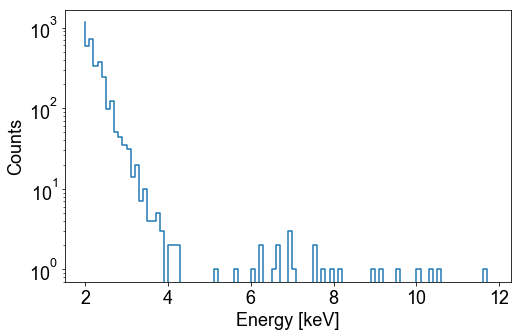

In [7]:
# Plot a simple spectrum of the whole evtdata

hist, bin_edges=np.histogram(evtdata['pi']*0.04+1.6,bins=np.arange(2.0,12,0.1))

# print(hist)
fig = plt.figure(figsize=(8, 5))
# as using the left bin edges want steps-pre
plt.semilogy(bin_edges[:-1],hist,drawstyle='steps-pre')
plt.xlabel('Energy [keV]')
plt.ylabel('Counts')

plt.show()

In [8]:
# # #look and see what all the header tags are
# for i in hdr.keys():
#     print(i)

# print some of them
print(hdr['date-obs'])
print(hdr['tstart'],hdr['tstop'])
print(hdr['ontime'])
print(hdr['exposure'],hdr['livetime'])
print(hdr['mjdrefi'])
print(hdr['TELESCOP'],hdr['INSTRUME'],hdr['obs_id'])

# Some playing about with the time formats
mjdref=astropy.time.Time(hdr['mjdrefi'],format='mjd')
tstart=astropy.time.Time(hdr['mjdrefi']*u.d+hdr['tstart']*u.s,format='mjd')
tstop=astropy.time.Time(hdr['mjdrefi']*u.d+hdr['tstop']*u.s,format='mjd')

print(mjdref.isot)
print(tstart.isot,tstop.isot)


2018-09-28T18:48:57
275856515.0 275856615.9999999
100.9999999403954
70.0321908915824 70.0321908915824
55197
NuSTAR FPMA 90410111001
2010-01-01T00:00:00.000
2018-09-28T18:48:35.000 2018-09-28T18:50:16.000
